In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the necessary libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

**Loading the dataset**

In [28]:
data_dir = "/content/drive/MyDrive/Img"

**Pre-processing the data**

In [33]:
x=[]
x1=[]
x2=[]
for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image)
    img = Image.open(image_path).resize((100, 100))
    img_array = np.array(img)
    img_array1 = np.array(img).flatten() / 255.0
    img_array2 = np.array(img).flatten() / 255.0
    x.append(img_array)
    x1.append(img_array1)
    x2.append(img_array2)
x = np.array(x)
x1 = np.array(x1)
x2 = np.array(x1)

In [34]:
print("The no of Images in dataset : ",len(x1))

The no of Images in dataset :  3410


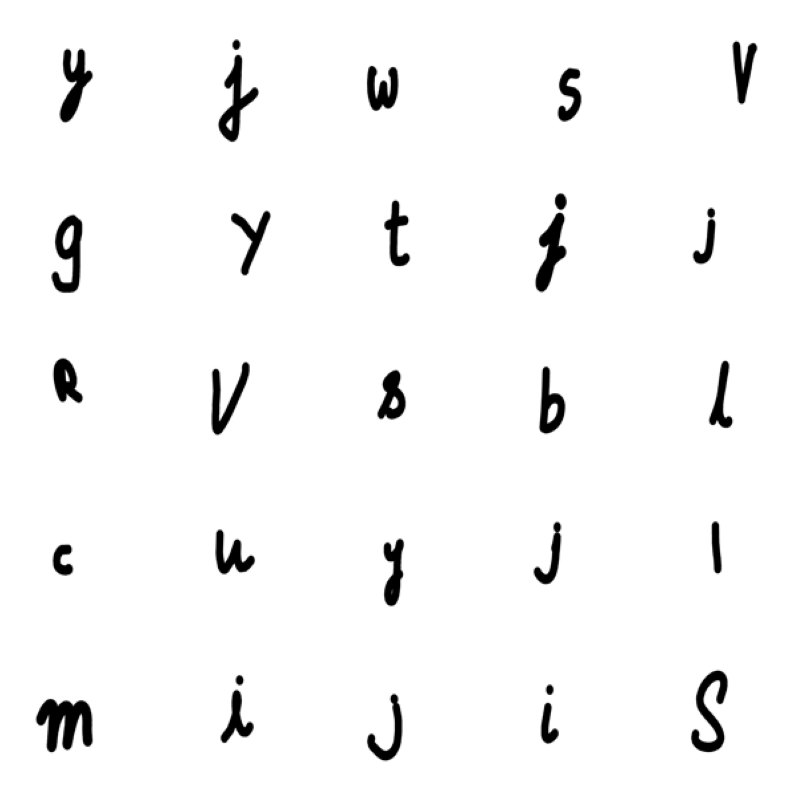

In [35]:
plt.figure(figsize=(10, 10))
for i in range(min(25, len(x))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')
plt.show()

**Exploratory Data Analysis**

In [36]:
y=pd.read_csv("/content/drive/MyDrive/english.csv")
len(y)

3410

In [37]:
y

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


Split the data into training, testing and validation sets

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)
print("x_train Dataset shape:", x_train.shape)
print("y_train shape:", len(y_train))
print("x_test shape:", x_test.shape)
print("y_test shape:", len(y_test))

x_train Dataset shape: (2387, 100, 100, 3)
y_train shape: 2387
x_test shape: (1023, 100, 100, 3)
y_test shape: 1023


**CNN Model**

In [39]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [40]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(100, 100, 3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(62, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.01),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=20,
validation_data=(x_test, y_test_encoded))

Epoch 1/20
75/75 [==============================] - 36s 462ms/step - loss: 5.3425 - accuracy: 0.5610 - val_loss: 0.6440 - val_accuracy: 0.6696
Epoch 2/20
75/75 [==============================] - 28s 377ms/step - loss: 0.8001 - accuracy: 0.6343 - val_loss: 0.6339 - val_accuracy: 0.6696
Epoch 3/20
75/75 [==============================] - 30s 397ms/step - loss: 0.7340 - accuracy: 0.6615 - val_loss: 0.6395 - val_accuracy: 0.6686
Epoch 4/20
75/75 [==============================] - 29s 384ms/step - loss: 0.6767 - accuracy: 0.6741 - val_loss: 0.6317 - val_accuracy: 0.6706
Epoch 5/20
75/75 [==============================] - 30s 407ms/step - loss: 0.6338 - accuracy: 0.6933 - val_loss: 0.6229 - val_accuracy: 0.6686
Epoch 6/20
75/75 [==============================] - 28s 378ms/step - loss: 0.6253 - accuracy: 0.6812 - val_loss: 0.6247 - val_accuracy: 0.6667
Epoch 7/20
75/75 [==============================] - 29s 384ms/step - loss: 0.6082 - accuracy: 0.6871 - val_loss: 0.6201 - val_accuracy: 0.6706

32/32 [==============================] - 4s 120ms/step - loss: 0.8733 - accuracy: 0.6579
testing Accuracy of Neural Network model using keras :0.6578690409660339






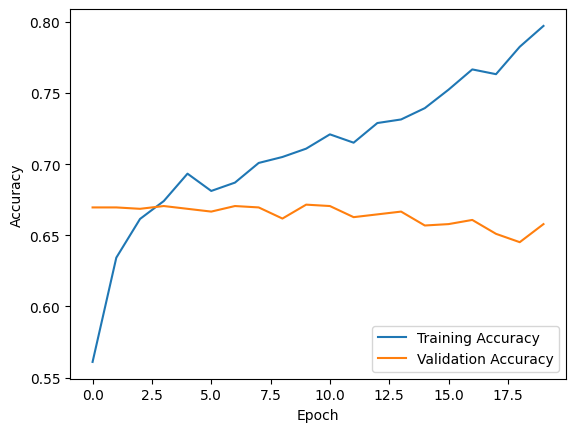

In [41]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"testing Accuracy of Neural Network model using keras :{test_accuracy}\n\n\n\n")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Neural network model Using Single Layer perceptron model**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x1, y,
test_size=0.3, random_state=42)
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [43]:
perceptron_model = Perceptron(max_iter=20, eta0=0.01)
train_accuracies = []
val_accuracies = []
for epoch in range(20):
    perceptron_model.partial_fit(x_train, y_train_encoded,classes = np.unique(y_train_encoded))
    y_train_pred = perceptron_model.predict(x_train)
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)
    y_val_pred = perceptron_model.predict(x_test)
    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/100 - Training Accuracy:{train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
y_test_pred = perceptron_model.predict(x_test)

Epoch 1/100 - Training Accuracy:0.6820, Validation Accuracy: 0.6432
Epoch 2/100 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 3/100 - Training Accuracy:0.6799, Validation Accuracy: 0.5992
Epoch 4/100 - Training Accuracy:0.6695, Validation Accuracy: 0.5924
Epoch 5/100 - Training Accuracy:0.6887, Validation Accuracy: 0.6002
Epoch 6/100 - Training Accuracy:0.7005, Validation Accuracy: 0.6051
Epoch 7/100 - Training Accuracy:0.6984, Validation Accuracy: 0.5894
Epoch 8/100 - Training Accuracy:0.6984, Validation Accuracy: 0.6139
Epoch 9/100 - Training Accuracy:0.7281, Validation Accuracy: 0.6491
Epoch 10/100 - Training Accuracy:0.7281, Validation Accuracy: 0.6334
Epoch 11/100 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 12/100 - Training Accuracy:0.7310, Validation Accuracy: 0.6618
Epoch 13/100 - Training Accuracy:0.7394, Validation Accuracy: 0.6569
Epoch 14/100 - Training Accuracy:0.7340, Validation Accuracy: 0.6422
Epoch 15/100 - Training Accuracy:0.7382, Va




Testing Accuracy fo Single Layer perceptron model :0.6217008797653959





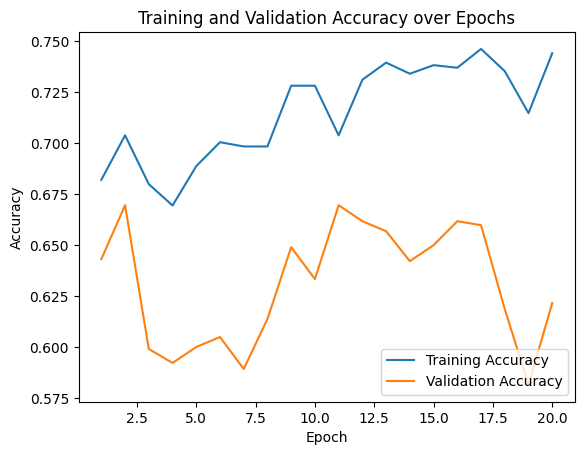

In [44]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\n\n\nTesting Accuracy fo Single Layer perceptron model :{test_accuracy}\n\n\n")
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

**Neural network model Using multiple Layer perceptron model**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x2, y,
test_size=0.3, random_state=42)

y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20,
learning_rate_init=0.01)

train_accuracies = []
val_accuracies = []

for epoch in range(20):
    mlp_model.partial_fit(x_train, y_train_encoded, classes=np.unique(y_train_encoded))

    y_train_pred = mlp_model.predict(x_train)

    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = mlp_model.predict(x_test)

    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/20 - Training Accuracy:{train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
y_test_pred = mlp_model.predict(x_test)

Epoch 1/20 - Training Accuracy:0.2962, Validation Accuracy: 0.3304
Epoch 2/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 3/20 - Training Accuracy:0.2962, Validation Accuracy: 0.3304
Epoch 4/20 - Training Accuracy:0.2962, Validation Accuracy: 0.3304
Epoch 5/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 6/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 7/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 8/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 9/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 10/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 11/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 12/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 13/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 14/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 15/20 - Training Accuracy:0.7038, Validation Accura

Testing Accuracy fo Multiple Layer perceptron model :0.6695992179863147


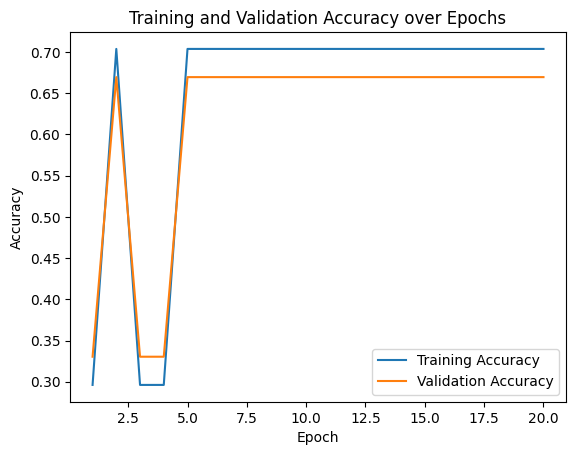

In [46]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Testing Accuracy fo Multiple Layer perceptron model :{test_accuracy}")
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()